In [1]:
import numpy as np
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 80.9MB/s]


In [3]:
df = pd.read_csv("netflix.csv")

In [6]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [7]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
## unesting of title with cast

constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new=pd.DataFrame(constraint,index=df['title'])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)
df_new=df_new[['title',0]]
df_new.columns=['title','cast']
df_new[df_new['cast']=='Rupa Bhimani']

,title,cast
313,Chhota Bheem,Rupa Bhimani
708,Mighty Raju,Rupa Bhimani
3373,Chhota Bheem - Dinosaur World,Rupa Bhimani
3379,Chhota Bheem - Neeli Pahaadi,Rupa Bhimani
3386,Chhota Bheem & Ganesh,Rupa Bhimani
3393,Chhota Bheem & Krishna: Mayanagari,Rupa Bhimani
3400,Chhota Bheem & Krishna: Pataliputra- City of t...,Rupa Bhimani
3407,Chhota Bheem And The Broken Amulet,Rupa Bhimani
3414,Chhota Bheem And The Crown of Valhalla,Rupa Bhimani
3421,Chhota Bheem and the Incan Adventure,Rupa Bhimani


In [9]:
## Unesting of Title with Directors
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df_new1=pd.DataFrame(constraint,index=df['title'])
df_new1=df_new1.stack()
df_new1=pd.DataFrame(df_new1)
df_new1.reset_index(inplace=True)
df_new1=df_new1[['title',0]]
df_new1.columns=['title','director']

In [10]:
df_new1

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [11]:
# unesting of Tittle with Country
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df_new2=pd.DataFrame(constraint,index=df['title'])
df_new2=df_new2.stack()
df_new2=pd.DataFrame(df_new2)
df_new2.reset_index(inplace=True)
df_new2=df_new2[['title',0]]
df_new2.columns=['title','country']

In [12]:
df_new2

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10840,Zodiac,United States
10841,Zombie Dumb,nan
10842,Zombieland,United States
10843,Zoom,United States


In [13]:
# unesting of Title with listed_in
constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new3=pd.DataFrame(constraint,index=df['title'])
df_new3=df_new3.stack()
df_new3=pd.DataFrame(df_new3)
df_new3.reset_index(inplace=True)
df_new3=df_new3[['title',0]]
df_new3.columns=['title','listed_in']

In [14]:
df_new3

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [15]:
## Merging of All Table

In [16]:
#define list of DataFrames
dfs = [df_new, df_new1, df_new2, df_new3]

#merge all DataFrames into one
final_df = reduce(lambda  left,right: pd.merge(left,right,on=['title'],
                                            how='inner'), dfs)

In [17]:
final_df

,title,cast,director,country,listed_in
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [18]:
t1 = df.drop(["cast","director","listed_in","country"], axis = 1)

In [19]:
t1

,show_id,type,title,date_added,release_year,rating,duration,description
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"September 24, 2021",2021,TV-MA,1 Season,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,"September 24, 2021",2021,TV-MA,1 Season,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"September 24, 2021",2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"November 20, 2019",2007,R,158 min,"A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,"July 1, 2019",2018,TV-Y7,2 Seasons,"While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"November 1, 2019",2009,R,88 min,Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"January 11, 2020",2006,PG,88 min,"Dragged from civilian life, a former superhero..."


In [20]:
## recovery of Leftover coulmn
t2 = final_df.merge(t1, on = "title", how = "left")

In [21]:
t2

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...


In [22]:
# Q.1 1. Defining Problem Statement and Analysing basic metrics

In [23]:
t2.dtypes ## data Type of All Attributes

title           object
cast            object
director        object
country         object
listed_in       object
show_id         object
type            object
date_added      object
release_year     int64
rating          object
duration        object
description     object
dtype: object

In [24]:
t2.isna().sum().sum() ## Count of Missing Values

228

In [25]:
t2.select_dtypes(include=np.number) # No of Numeric columns

,release_year
0,2020
1,2021
2,2021
3,2021
4,2021
...,...
201986,2015
201987,2015
201988,2015
201989,2015


In [26]:
# No of categorial columns
to_convert = ["title","cast","director","country","listed_in","type","rating","description"]
for col in to_convert:
  df[col] = df[col].astype('category')

df[to_convert].apply(lambda x: x.astype('category'), axis=0)

,title,cast,director,country,listed_in,type,rating,description
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,United States,Documentaries,Movie,PG-13,"As her father nears the end of his life, filmm..."
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Show,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Julien Leclercq,NaN,"Crime TV Shows, International TV Shows, TV Act...",TV Show,TV-MA,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,NaN,"Docuseries, Reality TV",TV Show,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",NaN,India,"International TV Shows, Romantic TV Shows, TV ...",TV Show,TV-MA,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",David Fincher,United States,"Cult Movies, Dramas, Thrillers",Movie,R,"A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,NaN,NaN,NaN,"Kids' TV, Korean TV Shows, TV Comedies",TV Show,TV-Y7,"While living alone in a spooky town, a young g..."
8804,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",Ruben Fleischer,United States,"Comedies, Horror Movies",Movie,R,Looking to survive in a world taken over by zo...
8805,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",Peter Hewitt,United States,"Children & Family Movies, Comedies",Movie,PG,"Dragged from civilian life, a former superhero..."


In [27]:
## Q.2 Observations on the shape of data, data types of all the attributes,
## conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [28]:
# Shape of the Data
t2.shape

(201991, 12)

This data set having 201991 records with 12 columns

In [29]:
# Data type of all attributes
t2.dtypes


title           object
cast            object
director        object
country         object
listed_in       object
show_id         object
type            object
date_added      object
release_year     int64
rating          object
duration        object
description     object
dtype: object

In [30]:
t2.isna().sum().sum() #missing value detection

228

Total 17213 Missing Value in Data set

In [31]:
to_convert = ["title","cast","director","country","listed_in","type","rating","description"]
for col in to_convert:
  df[col] = df[col].astype('category')

In [32]:
t3 = df[to_convert].apply(lambda x: x.astype('category'), axis=0)

In [33]:
t3

,title,cast,director,country,listed_in,type,rating,description
0,Dick Johnson Is Dead,NaN,Kirsten Johnson,United States,Documentaries,Movie,PG-13,"As her father nears the end of his life, filmm..."
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",NaN,South Africa,"International TV Shows, TV Dramas, TV Mysteries",TV Show,TV-MA,"After crossing paths at a party, a Cape Town t..."
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Julien Leclercq,NaN,"Crime TV Shows, International TV Shows, TV Act...",TV Show,TV-MA,To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,NaN,"Docuseries, Reality TV",TV Show,TV-MA,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",NaN,India,"International TV Shows, Romantic TV Shows, TV ...",TV Show,TV-MA,In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",David Fincher,United States,"Cult Movies, Dramas, Thrillers",Movie,R,"A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,NaN,NaN,NaN,"Kids' TV, Korean TV Shows, TV Comedies",TV Show,TV-Y7,"While living alone in a spooky town, a young g..."
8804,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",Ruben Fleischer,United States,"Comedies, Horror Movies",Movie,R,Looking to survive in a world taken over by zo...
8805,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",Peter Hewitt,United States,"Children & Family Movies, Comedies",Movie,PG,"Dragged from civilian life, a former superhero..."


In [34]:
t2.describe() ## Statistical summury

,release_year
count,201991.000000
mean,2013.452891
std,9.003933
min,1925.000000
25%,2012.000000
50%,2016.000000
75%,2019.000000
max,2021.000000


In [35]:
# Q.3  Non-Graphical Analysis: Value counts and unique attribute

In [36]:
t2["title"].nunique()

8807

In title column the total range of the attributes is 8807 entries

In [37]:
t2["title"].value_counts()

Kahlil Gibran's The Prophet    700
Holidays                       504
Movie 43                       468
The Eddy                       416
Narcos                         378
                              ... 
Thackeray                        1
The 2000s                        1
Miniforce: Super Dino Power      1
Dancing with the Birds           1
Dick Johnson Is Dead             1
Name: title, Length: 8807, dtype: int64

In [38]:
t2["cast"].nunique()

36440

In cast Column the total range of the attributes is 36440

In [39]:
t2["cast"].value_counts()

nan               2146
Liam Neeson        161
Alfred Molina      160
John Krasinski     139
Salma Hayek        130
                  ... 
Dario Yazbek         1
Corinne Foxx         1
Jacob Craner         1
Laila Berzins        1
Richard Ryan         1
Name: cast, Length: 36440, dtype: int64

In [40]:
t2["country"].nunique()

128

 In country column the total range of the attributes is 128

In [41]:
t2["country"].value_counts()

United States     59349
India             22814
United Kingdom    12945
nan               11897
Japan              8679
                  ...  
Palestine             2
Kazakhstan            1
Nicaragua             1
United States,        1
Uganda                1
Name: country, Length: 128, dtype: int64

In [42]:
t2["director"].nunique()

4994

In director column the total range of attributes is 4994

In [43]:
t2["director"].value_counts()

nan                    50643
Martin Scorsese          419
Youssef Chahine          409
Cathy Garcia-Molina      356
Steven Spielberg         355
                       ...  
Richard Maurice            1
Richard E. Norman          1
Spencer Williams           1
Oscar Micheaux             1
Kirsten Johnson            1
Name: director, Length: 4994, dtype: int64

In [44]:
##  Visual Analysis - Univariate, Bivariate after pre-processing of the data

## Univariant Analysis

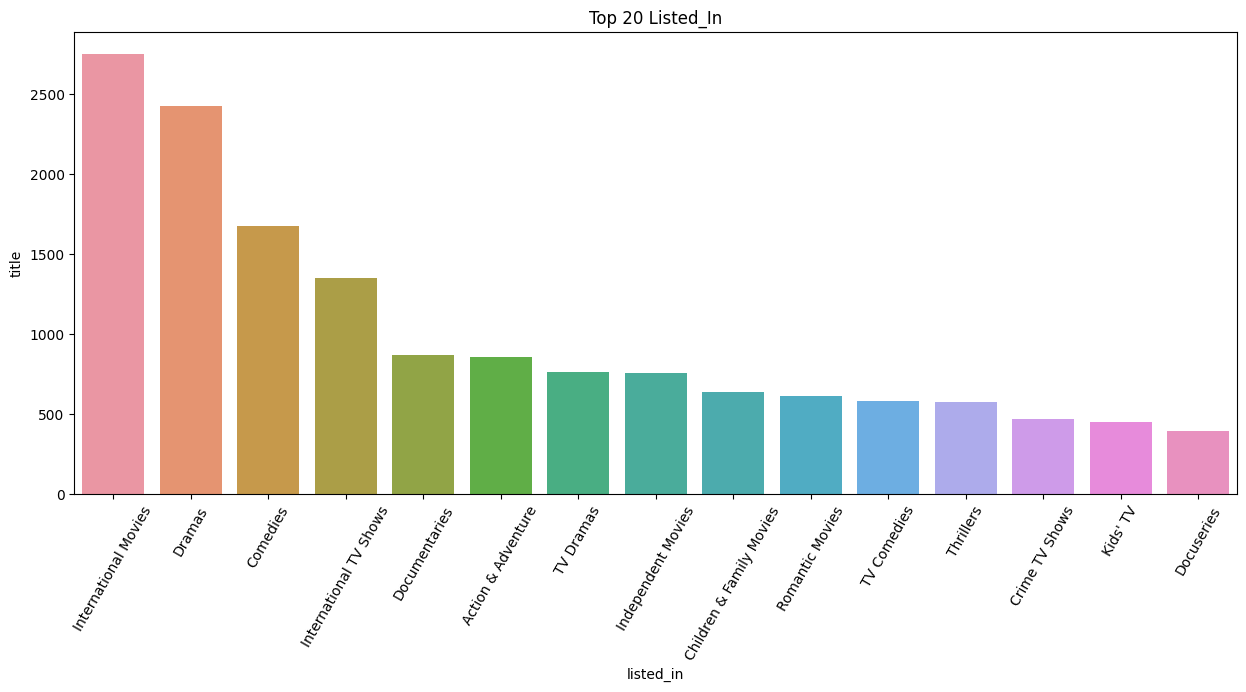

In [45]:
df= t2.groupby(["listed_in"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:15]
plt.figure(figsize=(15,6))
sns.barplot(x = "listed_in", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 20 Listed_In")
plt.show()

As from the plot one of the top listed movies are international movies

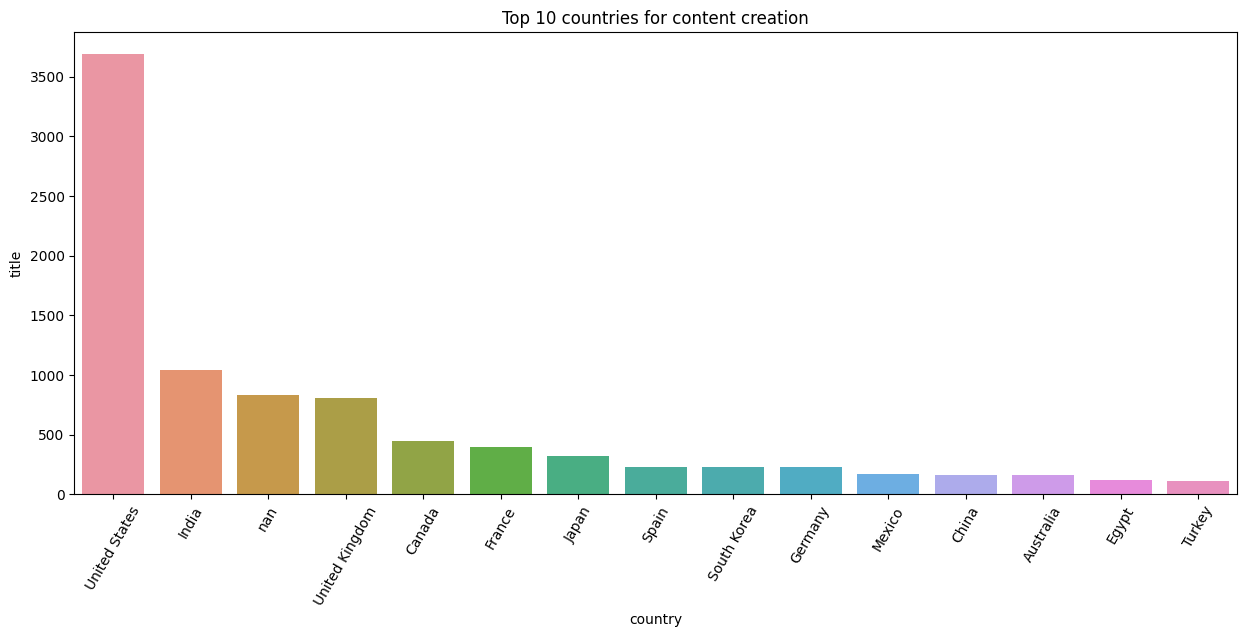

In [46]:
df= t2.groupby(["country"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:15]
plt.figure(figsize=(15,6))
sns.barplot(x = "country", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 10 countries for content creation")
plt.show()

As form plot the united state is in top country for content creaction with respect to movies and TV shows

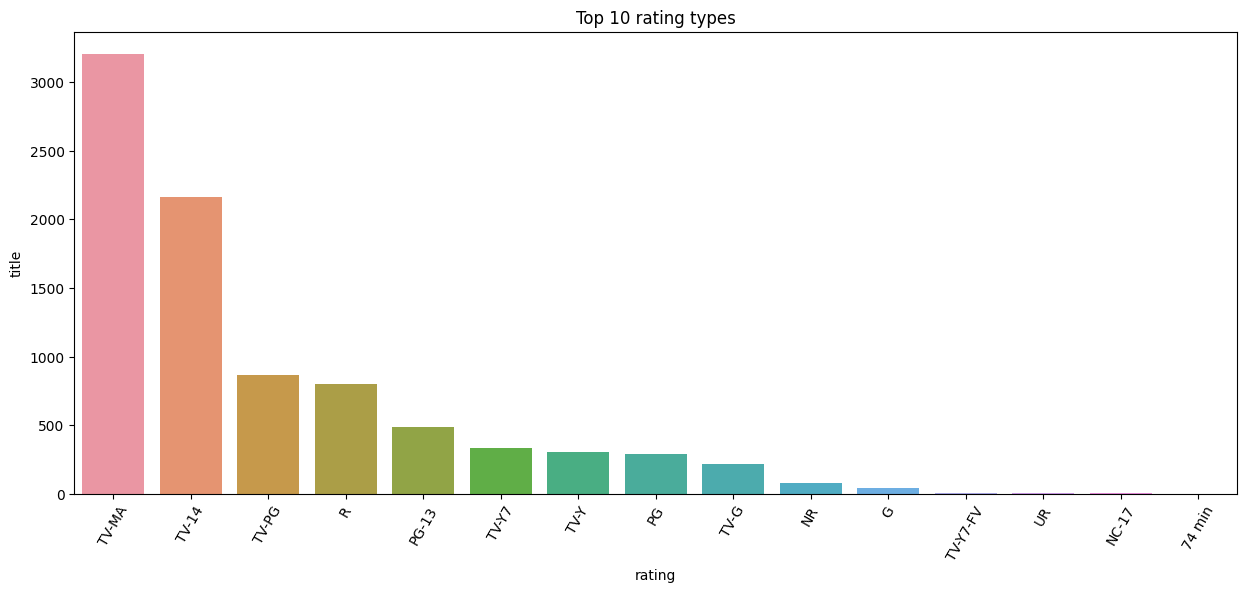

In [47]:
df= t2.groupby(["rating"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:15]
plt.figure(figsize=(15,6))
sns.barplot(x = "rating", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 10 rating types")
plt.show()

As from the plot the most of the movies and tv shows is rated by TV-MA

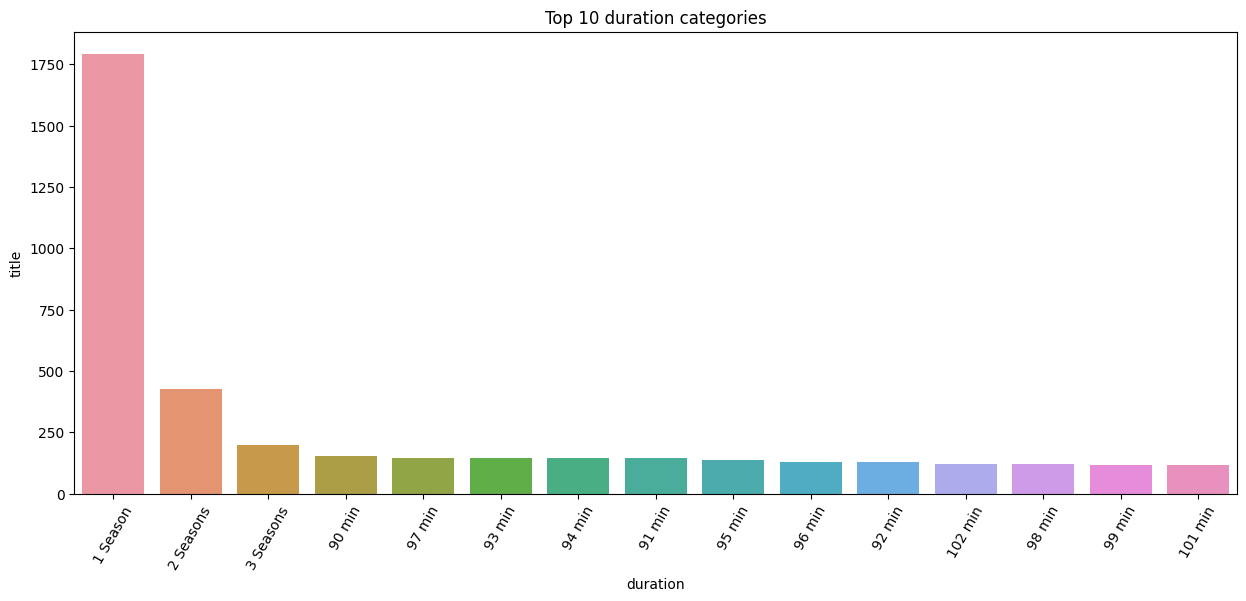

In [48]:
df= t2.groupby(["duration"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:15]
plt.figure(figsize=(15,6))
sns.barplot(x = "duration", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 10 duration categories")
plt.show()

It clearly shows from the plot most watched movies/TV shows are of 1 season duration

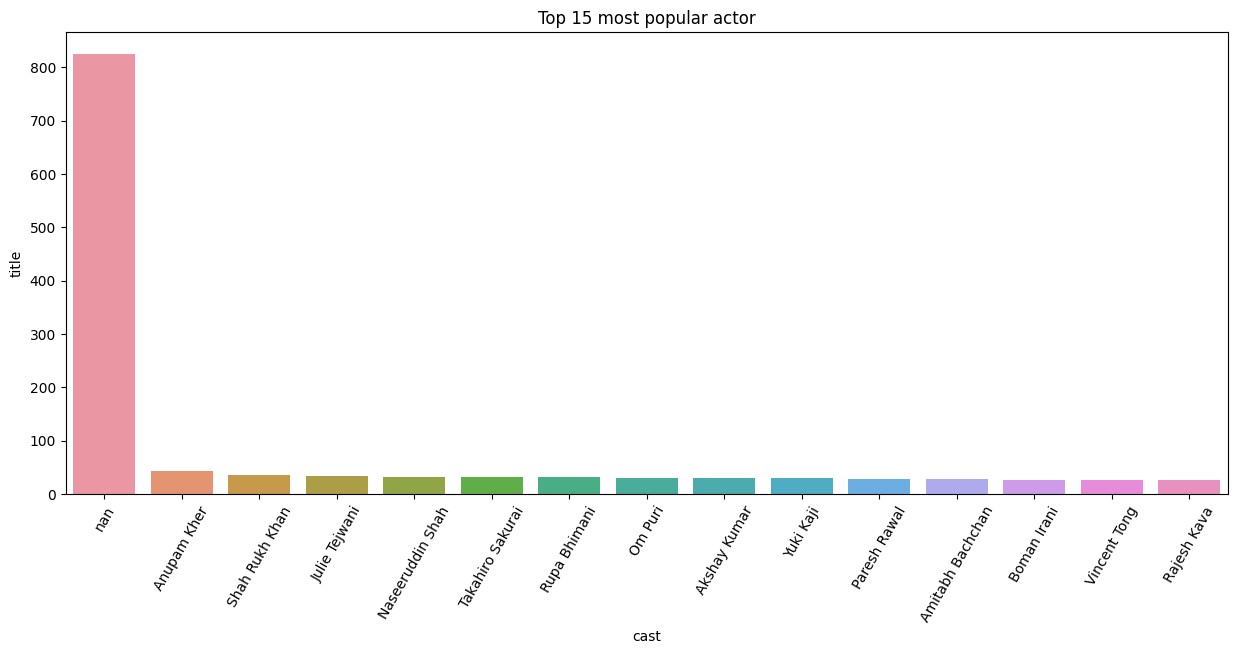

In [49]:
df= t2.groupby(["cast"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:15]
plt.figure(figsize=(15,6))
sns.barplot(x = "cast", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 15 most popular actor")
plt.show()

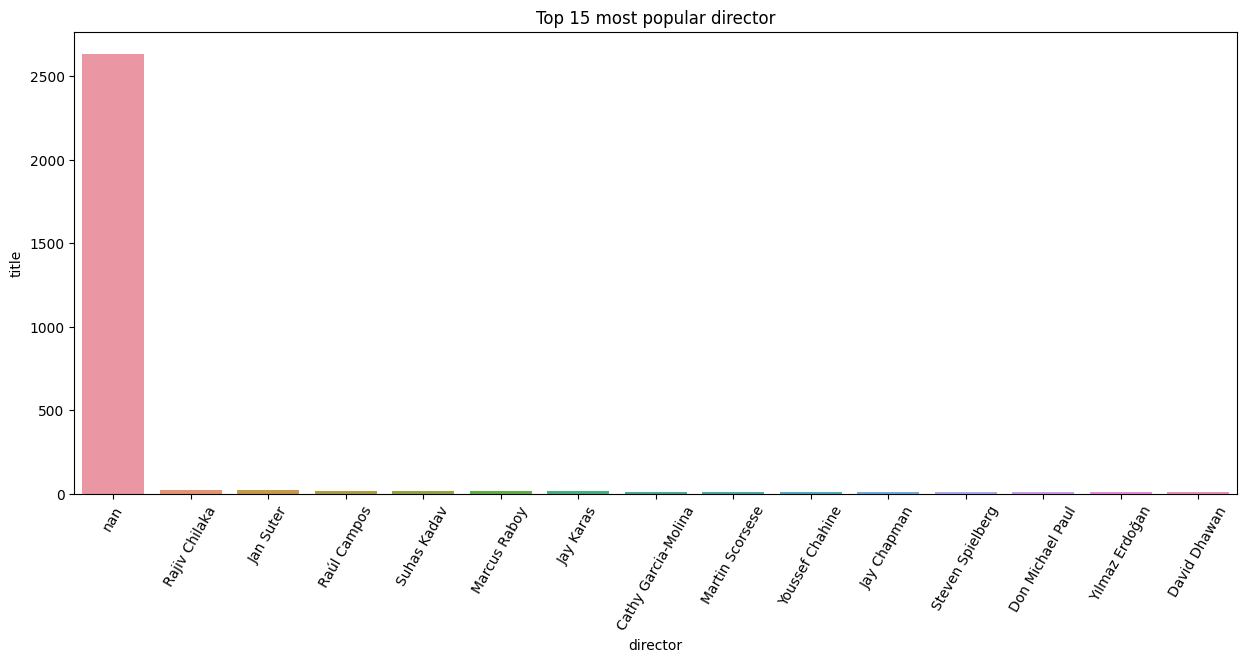

In [50]:
df= t2.groupby(["director"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:15]
plt.figure(figsize=(15,6))
sns.barplot(x = "director", y = "title", data = df)
plt.xticks(rotation = 60)
plt.title("Top 15 most popular director")
plt.show()

As from the plot jan suter is most popular director

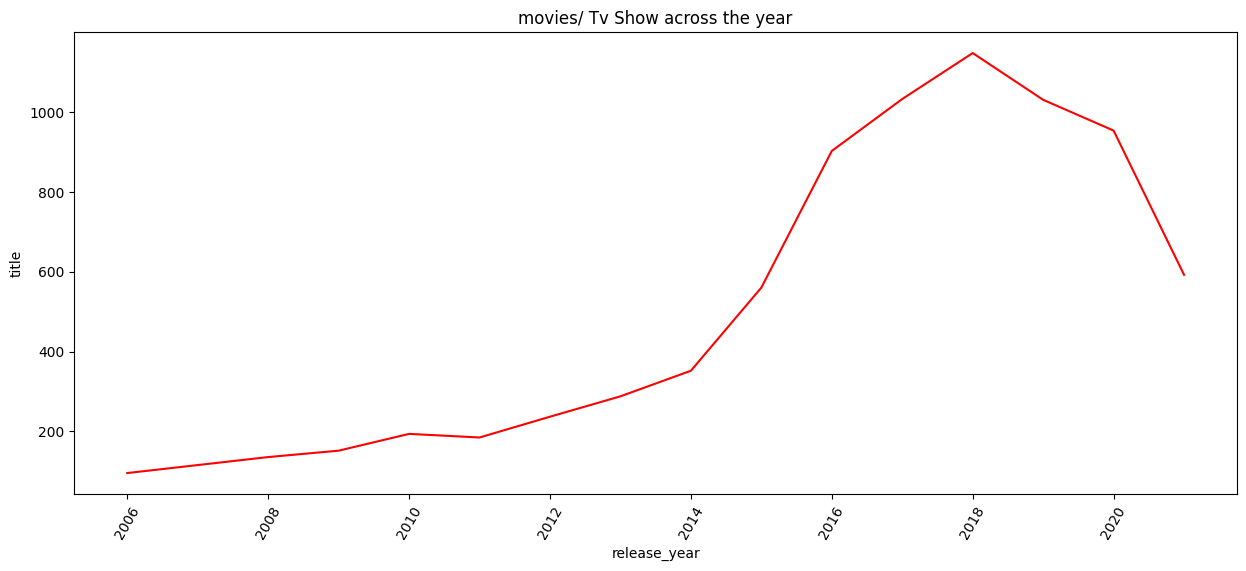

In [51]:
df= t2.groupby(["release_year"]).agg({"title":"nunique"}).reset_index().sort_values(by = ["title"], ascending = False)[:15]
plt.figure(figsize=(15,6))
sns.lineplot(x = "release_year", y = "title", data = df, color = "red")
plt.xticks(rotation = 60)
plt.title("movies/ Tv Show across the year")
plt.show()

## the amount of content across the Netflix has increased from 2008 till 2019 and then started deceases from 2019

In [52]:
## Histogram to see the distribution of duration

<Figure size 1000x200 with 0 Axes>

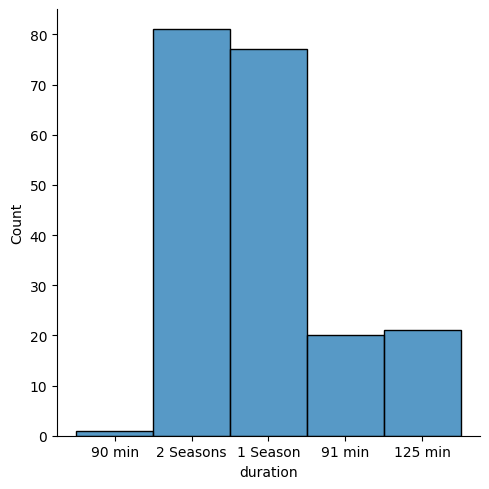

In [53]:
plt.figure(figsize=(10,2))
sns.displot(t2["duration"][:200])
plt.show()

Text(0.5, 1.0, 'Movies and and Tv show added by year')

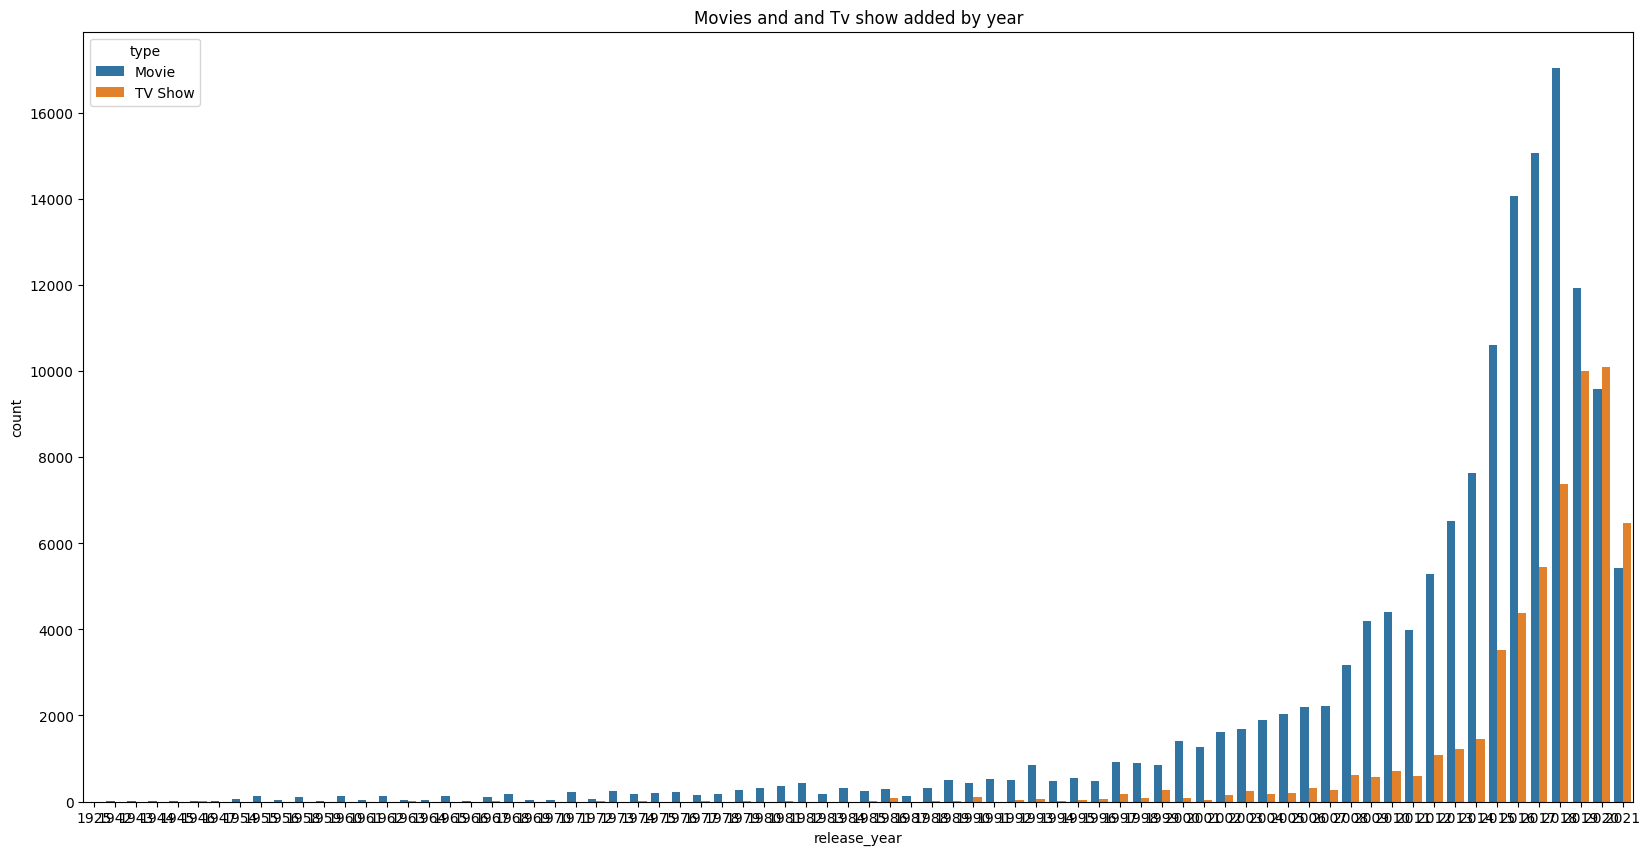

In [54]:
fig = plt.figure(figsize=(20,10))
sns.countplot(data = t2, x = "release_year", hue = "type")
plt.title("Movies and and Tv show added by year")

In [ ]:
t2.head()

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


Bivariant Analysis

(2000.0, 2020.0)

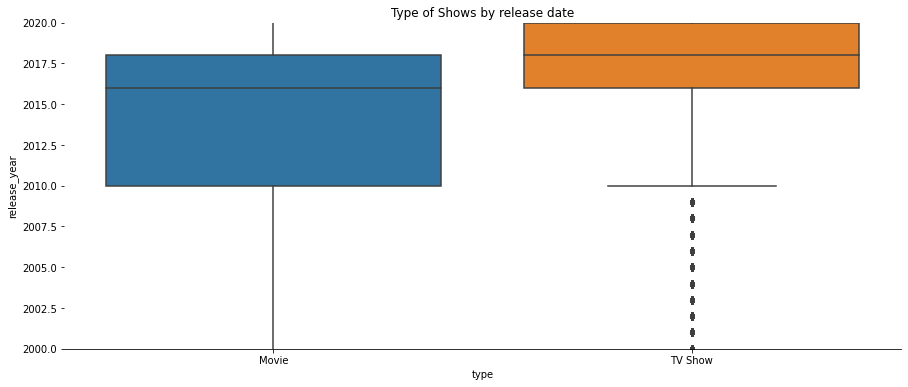

In [ ]:
## Boxplot for categorial variables

plt.figure(figsize=(15,6))
sns.boxplot(x="type", y = "release_year", data = t2)
sns.despine(left = True)
plt.title("Type of Shows by release date")
plt.ylim(2000,2020)

As from the box plot the most of the TV show are made in between 2017 to 2020 and Tv Show contains most outliers

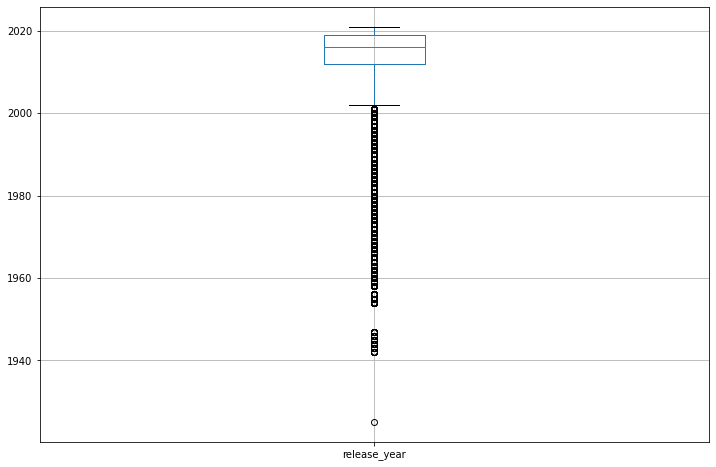

In [ ]:
## Missing Value and Outlier Check

plt.figure(figsize = (12,8))
t2.boxplot()
plt.show()

In [ ]:
## Missing Value & Outlier check Treatment Process

def outlier_limits(col):
  Q3, Q1 = np.nanpercentile(col, [75,25])
  IQR = Q3 - Q1
  UL = Q3 + 1.5*IQR
  ll = Q1 - 1.5*IQR
  return UL, ll

In [ ]:
for column in t2.columns:
  if t2[column].dtype != "object":
    UL, ll = outlier_limits(t2[column])
    t2[column] = np.where((t2[column]>UL)|(t2[column]<ll), np.nan, t2[column])

In [ ]:
t2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   title         201991 non-null  object 
 1   cast          201991 non-null  object 
 2   director      201991 non-null  object 
 3   country       201991 non-null  object 
 4   listed_in     201991 non-null  object 
 5   show_id       201991 non-null  object 
 6   type          201991 non-null  object 
 7   date_added    201833 non-null  object 
 8   release_year  185519 non-null  float64
 9   rating        201924 non-null  object 
 10  duration      201988 non-null  object 
 11  description   201991 non-null  object 
dtypes: float64(1), object(11)
memory usage: 28.1+ MB


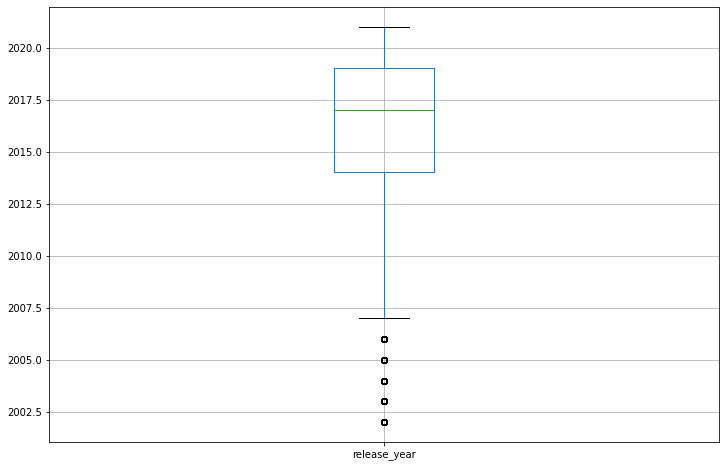

In [ ]:
## Treacted DataFrame

plt.figure(figsize = (12,8))
t2.boxplot()
plt.show()

Bivariant Analysis

In [ ]:
##  For correlation: Heatmaps

In [ ]:
import datetime

In [ ]:
t2.head()

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020.0,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
t2['Month'] = pd.to_datetime(t2['date_added']).dt.strftime('%B')

In [ ]:
t2

,title,cast,director,country,listed_in,show_id,type,date_added,release_year,rating,duration,description,Month
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,"September 25, 2021",2020.0,PG-13,90 min,"As her father nears the end of his life, filmm...",September
1,Blood & Water,Ama Qamata,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
2,Blood & Water,Ama Qamata,nan,South Africa,TV Dramas,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
3,Blood & Water,Ama Qamata,nan,South Africa,TV Mysteries,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
4,Blood & Water,Khosi Ngema,nan,South Africa,International TV Shows,s2,TV Show,"September 24, 2021",2021.0,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015.0,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201987,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals,s8807,Movie,"March 2, 2019",2015.0,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201988,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas,s8807,Movie,"March 2, 2019",2015.0,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March
201989,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies,s8807,Movie,"March 2, 2019",2015.0,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March


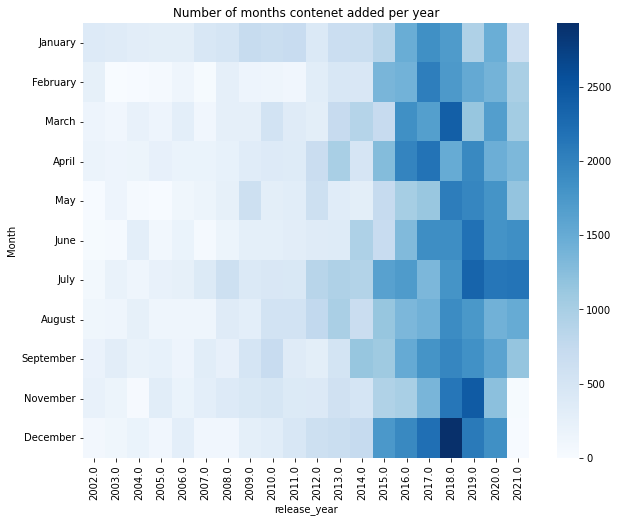

In [ ]:
Month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "November", "December"]
content = t2.groupby("release_year")["Month"].value_counts().unstack().fillna(0)[Month_order].T
plt.figure(figsize = (10,8))
plt.title("Number of months contenet added per year")
sns.heatmap(content, cmap = "Blues")
plt.show()

Business Insights

(1) Over the years both TV shows and movie contents addtion has increased till 2020, but after 2020 its started declining may be due to Covid relief, number of Movies added is more compare to TV shows over the years

(2) Most of the content get added in december and july month, for day wise, Friday is the best day followed by Thursday

(3) It was evident that 1st of every month was when the most content was added.

(4) Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most Watched content.

(5) Rajiv Chilaka, Jan Suter and Raul Campos are the most popular directors across Netflix

(6) Rajiv Chilaka director producing more movies

(7) Netflix is more focussing on movies compare to TV shows

(8) There is a 70:30 ratio of Movies and TV Shows content in Netflix platform

(9) International Movies, Dramas and Comedies are the most popular are most popular Genre

(10) US,India,UK,Canada and France are leading countries in Content Creation on Netflix

(11) Most of the highly rated content on Netflix is intended for Mature Audiences

(12) The duration of Most Watched content in our whole data is 80-120 mins. These must be movies and Shows having only 1 Season.

(13)United States is leading across both TV Shows and Movies, UK also provides great content across TV Shows and Movies. Surprisingly India is much more prevalent in Movies as compared TV Shows.

(14) Moreover the number of Movies created in India outweigh the sum of TV Shows and Movies across UK since India was rated as second in net sum of whole content across Netflix.

Recommendation

(1) the most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV Shows/Movies, so recommended to generate more content on these genres.

(2) Add TV Shows/ movies in the month of July 1st or August 1st.

(3) Add movies for Indian Audience, it has been declining since 2018.

(4) While creating content, take into consideration the popular actors/directors for that country. Also take into account the director-actor combination which is highly recommended.

(5) For audience 80-120 mins is the recommended length for movies.